In [ ]:
import numpy as np

# Define the states and actions
states = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
numStates = len(states)
numActions = 4
actions = ['up', 'down', 'right', 'left']

# Define the transition matrix
R = np.array([
    ['A', 'E', 'B', 'A'],
    ['B', 'F', 'C', 'A'],
    ['C', 'G', 'D', 'B'],
    ['D', 'H', 'D', 'C'],
    ['A', 'I', 'F', 'E'],
    ['B', 'J', 'G', 'E'],
    ['C', 'K', 'H', 'F'],
    ['D', 'L', 'H', 'G'],
    ['E', 'M', 'J', 'I'],
    ['F', 'N', 'K', 'I'],
    ['G', 'O', 'L', 'J'],
    ['H', 'P', 'L', 'K'],
    ['I', 'M', 'N', 'M'],
    ['J', 'N', 'O', 'M'],
    ['K', 'O', 'P', 'N'],
    ['L', 'P', 'P', 'O']
])
listOfHoles = np.array(['F', 'H', 'L', 'M'])

In [ ]:
# Define a function to choose an action using epsilon-greedy policy
def choose_action(state_index):
    #if np.random.uniform() > epsilon:
    if np.random.uniform(0, 1) < epsilon:
        # Explore: Choose a random action
        return np.random.randint(0, numActions)
    else:
        # Exploit: Choose the action with the highest Q-value
        return np.argmax(Q[state_index, :])

In [ ]:
# Hyperparameters
alpha = 0.9    # Learning rate
gamma = 0.9    # Discount factor
numEpisodes = 8000
maxSteps = 99  # Maximum steps per episode
epsilon_decay = 0.995  # Epsilon decay rate
epsilon_min = 0.01  # Minimum epsilon value

In [ ]:
# Initialize the Q-table with zeros
Q = np.zeros((numStates, numActions))
epsilon = 0.9  # Exploration rate

# Q-learning algorithm
for episode in range(numEpisodes):
    state = 'A'  # Start from state A
    state_index = states.index(state)

    for step in range(maxSteps):
        action = choose_action(state_index)

        next_state = R[state_index, action]
        next_state_index = states.index(next_state)

        reward = 0
        if next_state == 'P':
            reward = 10
        if next_state in listOfHoles:
            reward = -10

        # Q-learning update rule
        Q[state_index, action] += alpha * (reward + gamma * np.max(Q[next_state_index, :]) - Q[state_index, action])

        # Transition to the next state
        state = next_state
        state_index = next_state_index

        # End the episode if the goal state or a terminal state is reached
        if state == 'P':
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

In [ ]:
print("Original Q: \n \n", Q)
print("R matrix: \n", R)
print("List of holes: ", listOfHoles)

Original Q: 
 
 [[ 5.31441     5.9049      5.9049      5.31441   ]
 [ 5.9049     -3.439       6.561       5.31441   ]
 [ 6.561       7.29        5.9049      5.9049    ]
 [ 5.9049     -3.43900015  5.9049      6.561     ]
 [ 5.31441     6.561      -3.439       5.9049    ]
 [ 5.9049      7.29        7.29        5.9049    ]
 [ 6.561       8.1        -3.439      -3.439     ]
 [ 5.90489996 -1.         -3.43900001  7.29      ]
 [ 5.9049     -2.71        7.29        6.561     ]
 [-3.439       8.1         8.1         6.561     ]
 [ 7.29        9.         -1.          7.29      ]
 [-3.439      10.         -1.          8.1       ]
 [ 6.561      -2.71        8.1        -2.71      ]
 [ 7.29        8.1         9.         -2.71      ]
 [ 8.1         9.         10.          8.1       ]
 [ 0.          0.          0.          0.        ]]
R matrix: 
 [['A' 'E' 'B' 'A']
 ['B' 'F' 'C' 'A']
 ['C' 'G' 'D' 'B']
 ['D' 'H' 'D' 'C']
 ['A' 'I' 'F' 'E']
 ['B' 'J' 'G' 'E']
 ['C' 'K' 'H' 'F']
 ['D' 'L' 'H' 'G']
 ['

# V table using Q-table

In [ ]:
# Create a dictionary to store state-value mappings
state_value_dict = {}

# Loop through each row in the transition matrix
for row_idx in range(len(R) - 1):
    for col_idx in range(len(R[row_idx])):
        state = R[row_idx][col_idx]  # Get state name
        value = Q[row_idx][col_idx]      # Get corresponding value

        # Update the dictionary with the value for the state
        state_value_dict[state] = value

# Print the final state-value mapping
for state in states:
    print(f"State {state}: {state_value_dict[state]}")

State A: 5.3144100000000005
State B: 5.9049000000000005
State C: 6.561
State D: 5.904899964477956
State E: 5.9049000000000005
State F: -3.439
State G: 7.29
State H: -3.439
State I: 6.561
State J: 7.29
State K: 8.1
State L: -1.0
State M: -2.71
State N: 8.1
State O: 9.0
State P: 10.0


# Training DP Model (noise)

## Training

In [ ]:
# Define the Frozen Lake environment
states = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
num_states = len(states)

In [ ]:
# Define the number of noise inputs
num_noise_inputs = 20  # additional noise inputs
total_inputs = num_states + num_noise_inputs  # Total input size (original inputs + noise)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Convert states to one-hot encoded vectors
def state_to_one_hot(state):
    one_hot = np.zeros(num_states)
    one_hot[states.index(state)] = 1
    return one_hot

# Step 2: Define the Model to Learn Noisy Values
V_model = tf.keras.Sequential([
    layers.Input(shape=(total_inputs,)),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output V(s) under noise
])
V_model.compile(optimizer='adam', loss='mse')

In [ ]:
# Function to generate random noise
def generate_noise(noise_size):
    return np.random.rand(noise_size)  # Random values between 0 and 1 for noise

def evaluate_vin_policy_with_noise(vin_model, noise_size=20, epsilon=0.9, max_steps=100):
    total_reward = 0
    time_steps = 0
    current_state = states[0]  # Start from the initial state

    while time_steps < max_steps:
        state_index = states.index(current_state)
        state_vector = state_to_one_hot(current_state)

        # Generate and append noise to the state vector
        noise_vector = generate_noise(noise_size)
        noisy_state_vector = np.concatenate([state_vector, noise_vector])

        # Predict the values for all possible actions with noise added
        action_values = []

        # Loop over possible actions to compute the values
        for action in range(len(R[state_index])):
            next_state = R[state_index][action]

            # Generate noise for the next state and append
            next_noise_vector = generate_noise(noise_size)
            next_state_vector = np.concatenate([state_to_one_hot(next_state), next_noise_vector])

            # Predict the value of the next state using the VIN model
            next_state_value = vin_model.predict(next_state_vector.reshape(1, -1))[0][0]
            action_values.append(next_state_value)

        # Exploitation: Choose the best action based on predicted values
        best_action = np.argmax(action_values)

        # Update the current state and calculate reward
        next_state = R[state_index][best_action]
        reward = 0
        if next_state == 'P':
            reward = 10
        elif next_state in listOfHoles:
            reward = -10

        total_reward += reward
        time_steps += 1

        # Check if we've reached a terminal state (e.g., 'P')
        if next_state == 'P':
            break

        # Update current state
        current_state = next_state

    return total_reward, time_steps

In [ ]:
# Step 4: Training Loop Using Noisy Values
reward_his = []
timestep_his = []

num_iterations = 200
for iteration in range(num_iterations):
    for state in states:
        state_vector = state_to_one_hot(state)

        # Generate and append noise to the state vector
        noise_vector = generate_noise(20)  # Adjust noise_size as needed
        noisy_state_vector = np.concatenate([state_vector, noise_vector])

        # Retrieve the clean value from the precomputed table
        clean_value = state_value_dict[state]

        # Train V_model to learn the clean value function, but with noisy state vectors
        V_model.fit(noisy_state_vector.reshape(1, -1), np.array([clean_value]), epochs=1, verbose=0)

    # Every 2 iterations, call the evaluation function
    if iteration % 2 == 0:
        total_reward, time_steps = evaluate_vin_policy_with_noise(V_model)  # Replace V_model with your trained model
        reward_his.append(total_reward)
        timestep_his.append(time_steps)
        #print(f"Iteration {iteration}, Total Reward: {total_reward}, Time Steps: {time_steps}")

print("Training complete.")

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

In [ ]:
# After training, print out the state values for all states
print("\nFinal State Values After Training:")
for state in states:
    state_vector = state_to_one_hot(state)
    noise_vector = np.random.random(num_noise_inputs)  # Add the same 20-dimensional noise vector
    noisy_state_vector = np.concatenate([state_vector, noise_vector])

    # Predict the value for the noisy state
    state_value = V_model.predict(noisy_state_vector.reshape(1, -1), verbose=0)

    print(f"State: {state}, Value: {state_value[0][0]}")


Final State Values After Training:
State: A, Value: 5.351677417755127
State: B, Value: 5.758253574371338
State: C, Value: 6.44572114944458
State: D, Value: 6.082704067230225
State: E, Value: 5.627852916717529
State: F, Value: -3.785885810852051
State: G, Value: 7.438194751739502
State: H, Value: -3.1981263160705566
State: I, Value: 6.5453877449035645
State: J, Value: 6.960368633270264
State: K, Value: 7.635495185852051
State: L, Value: -1.2471058368682861
State: M, Value: -2.8738884925842285
State: N, Value: 7.808894634246826
State: O, Value: 9.070441246032715
State: P, Value: 9.754290580749512


In [ ]:
result = []
for i in range(len(reward_his)):
    result.append(reward_his[i] - timestep_his[i])

print(result)

[-210, -150, -21, -64, -110, -96, -100, -64, -8, -14, -6, -10, 3, -35, -18, -3, -3, 0, -5, -3, 2, 4, 2, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4]


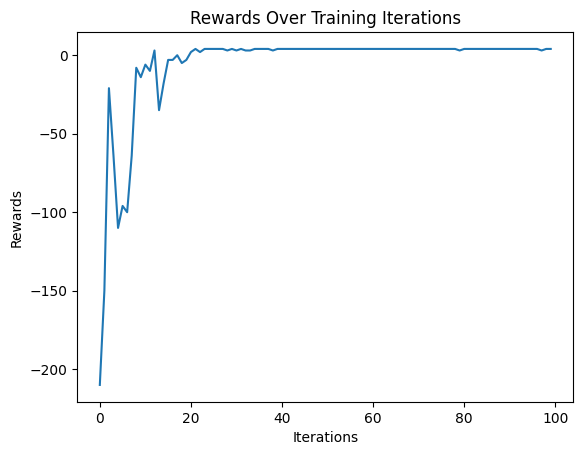

In [ ]:
import matplotlib.pyplot as plt


# Assume reward_history contains the rewards at intervals
evaluation_intervals = range(0, 200)

# Plot the rewards over the training iterations
plt.plot(result)

# Add labels and title to the plot
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.title('Rewards Over Training Iterations')

# Optional: Display the grid
#plt.grid(True)

# Show the plot
plt.show()

## Testing


In [ ]:
reward_history_test = []
time_steps_history_test = []
for iteration in range(200):
  policy_reward, policy_time_steps = evaluate_vin_policy_with_noise(V_model)
  reward_history_test.append(policy_reward)
  time_steps_history_test.append(policy_time_steps)  # Store the time steps for this evaluation
  print(f"Iteration {iteration}: Evaluated reward = {policy_reward}, Time steps = {policy_time_steps}")

  #e = max(0.01, e * 0.995)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Iteration 0: Evaluated reward = 10, Time steps = 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
result_test = []
for i in range(len(reward_history_test)):
    result_test.append(reward_history_test[i] - time_steps_history_test[i])

print(result_test)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


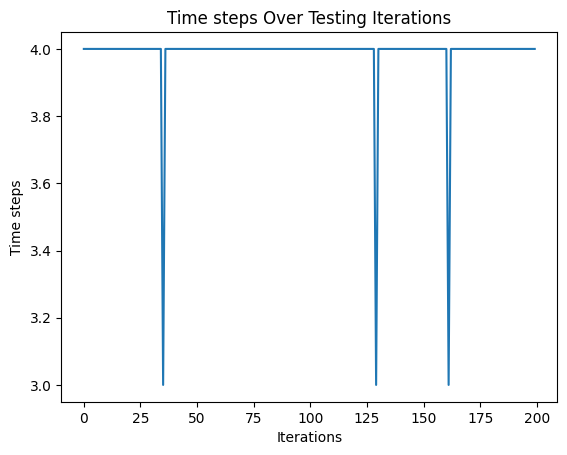

In [ ]:
# Assume reward_history contains the rewards at intervals
evaluation_intervals2 = range(0, 200)

# Plot the rewards over the training iterations
plt.plot(result_test)

# Add labels and title to the plot
plt.xlabel('Iterations')
plt.ylabel('Time steps')
plt.title('Time steps Over Testing Iterations')

# Optional: Display the grid
#plt.grid(True)

# Show the plot
plt.show()

# Extract features

In [ ]:
# Step 1: Freeze the layers of the original model
for layer in V_model.layers:
    layer.trainable = False

for layer in V_model.layers:
    print(layer.name)

dense_12
dense_13
dense_14
dense_15


In [ ]:
# Assuming your original model structure is something like this:
#input_layer = layers.Input(shape=(total_inputs,))
first_hidden_layer_output = V_model.get_layer('dense_14').output

# Create the feature extraction model

feature_extractor = tf.keras.Model(inputs=V_model.inputs, outputs=first_hidden_layer_output)
# Create dummy data
dummy_input = np.random.random((1, 36))

# Predict features using the feature extractor
try:
    features = feature_extractor.predict(dummy_input)
    print("Feature extraction successful. Output shape:", features.shape)
except Exception as e:
    print("Error during feature extraction:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Feature extraction successful. Output shape: (1, 32)


In [ ]:
# Extract features for each state after training
state_features_dict = {}
print("\nExtracted Features for Each State:")

for state in states:
    # One-hot encode the state and add noise
    state_vector = state_to_one_hot(state)
    noise_vector = np.random.random(num_noise_inputs)
    noisy_state_vector = np.concatenate([state_vector, noise_vector])

    # Use the feature extractor model to get the features
    extracted_features = feature_extractor.predict(noisy_state_vector.reshape(1, -1), verbose=0)
    state_features_dict[state] = extracted_features.reshape(-1)

    print(f"State: {state}, Extracted Features:\n {extracted_features}")


Extracted Features for Each State:
State: A, Extracted Features:
 [[ 0.07502259 -0.12756099  0.80778193 -0.5147882   0.00337205  0.9183813
   0.08798262  0.24830411 -0.47446725 -0.1342595  -0.15196161  0.08231008
   0.5876984  -0.6877247   0.43688086 -0.41600087 -0.759545   -0.29054776
  -0.4067454  -0.69781625 -0.50702167  0.0802117  -0.58070344  0.00840273
  -0.13062906 -0.80321217 -0.2760588   0.13340712  0.04670807 -0.51859075
   0.64371425 -0.47906384]]
State: B, Extracted Features:
 [[ 0.07679923 -0.39170423  0.24794482  0.06906867  0.6354013   0.89655465
  -0.46935853 -0.06281761 -0.10998087  0.00498709 -0.2942472  -0.51203907
   0.5864523  -0.6721147   0.6702656  -0.42199445 -0.5823598  -0.110768
  -0.2768327  -0.6469538   0.09170714 -0.08926392 -0.11383025  0.261599
   0.1653756  -0.9177685  -0.5844655   0.5375933  -0.19679725 -0.50295323
   0.82185596 -0.53466123]]
State: C, Extracted Features:
 [[ 0.55402356 -0.6068194  -0.00107285  0.2852696   0.17948464  0.90270853
  -0.2

In [ ]:
# convert to 0 & 1
for state, features in state_features_dict.items():
    state_features_dict[state] = np.where(features > 0, 1, -1)

In [ ]:
for state in states:
    print(state_features_dict[state])

[ 1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1  1 -1]
[ 1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1
  1 -1 -1  1 -1 -1  1 -1]
[ 1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1 -1  1 -1]
[ 1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1  1  1  1 -1  1 -1]
[ 1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1 -1]
[ 1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1  1 -1]
[ 1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1  1 -1  1 -1]
[ 1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1]
[ 1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1]
[ 1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1]
[-1  1  1 

In [ ]:
# Initialize Transition Table
transition_table = {}  # {(tuple(features), action) -> next_features}

for state in states:
    state_features = state_features_dict[state]  # Extracted feature representation

    for action in range(4):
        next_state = R[states.index(state)][action]  # Get next state from transition matrix
        next_features = state_features_dict[next_state]  # Extracted features of next state

        # Store in transition table
        transition_table[(tuple(state_features), action)] = next_features

In [ ]:
for (features, action), next_features in transition_table.items():
    print(f"State Features: {features} + Action {action} → Next Features: {next_features}")

State Features: (1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1) + Action 0 → Next Features: [ 1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1  1  1 -1  1 -1]
State Features: (1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1) + Action 1 → Next Features: [ 1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1 -1]
State Features: (1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1) + Action 2 → Next Features: [ 1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1
  1 -1 -1  1 -1 -1  1 -1]
State Features: (1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1) + Action 3 → Next Features: [ 1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 

# Train New Model in Feature Space

In [ ]:
# Define a new model using the extracted features
model2 = tf.keras.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse')

In [ ]:
def evaluate_trained_model(vin_model, num_episodes=200):
    #total_rewards = []
    state = 'A'  # Start at the initial state
    total_reward = 0
    steps = 0

    while steps < 100:  # Stop at goal or hole
        action_values = []  # Store predicted values for all actions
        # Extract features for the current state
        features = state_features_dict[state]

        for action in range(num_actions):
            next_features = transition_table.get((tuple(features), action), features)  # Get next extracted features

          # Predict value of next extracted features using model
            next_features_reshaped = np.array(next_features).reshape(1, -1)
            predicted_value = vin_model.predict(next_features_reshaped, verbose=0)[0][0]

            action_values.append(predicted_value)  # Store predicted value for this action

        # Use argmax to select the best action based on predicted values
        best_action = np.argmax(action_values)

        # Execute the best action
        next_state = R[states.index(state)][best_action]  # Get next state
        reward = 10 if next_state == 'P' else (-10 if next_state in listOfHoles else 0)  # Assign reward

        total_reward += reward
        steps += 1

        if next_state == 'P':
          break

        state = next_state  # Move to next state
        #total_rewards.append(total_reward)

    #avg_reward = np.mean(total_rewards)
    return total_reward, steps

In [ ]:
import time
num_actions = 4
evaluation_interval = 2
# Store reward history for plotting or analysis
reward_history2 = []
time_steps_history2 = []

# Start timer
start_time2 = time.time()

for iteration in range(200):
    for state in states:
        state_features = state_features_dict[state]  # Extracted features

        next_state_vectors = np.array([
            transition_table[(tuple(state_features), a)]
            for a in range(num_actions)
        ])

        # Predict values for next states using the model
        next_state_values = model2.predict(next_state_vectors)

        # Bellman Update
        target_value = -float('inf')
        for a in range(num_actions):
            reward = 1 if state == 'P' else (-10 if state in listOfHoles else 0)

            # Calculate target value
            value = reward + gamma * next_state_values[a]
            target_value = max(target_value, value)

        # Train model on extracted features
        model2.fit(state_features.reshape(1, -1), np.array([target_value]), epochs=1, verbose=0)

    if iteration % evaluation_interval == 0:
      policy_reward, policy_time_steps = evaluate_trained_model(model2)
      reward_history2.append(policy_reward)
      time_steps_history2.append(policy_time_steps)  # Store the time steps for this evaluation

end_time2 = time.time()

# Calculate elapsed time
elapsed_time2 = end_time2 - start_time2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [ ]:
print(elapsed_time2)

1181.6676511764526


In [ ]:
result2 = []
for i in range(len(reward_history2)):
    result2.append(reward_history2[i] - time_steps_history2[i])

print(result2)

[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


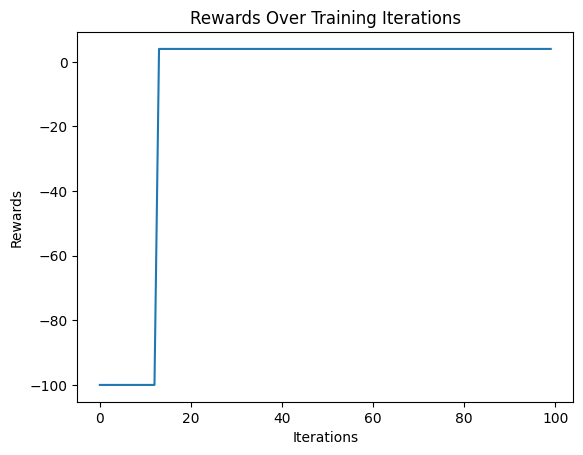

In [ ]:
import matplotlib.pyplot as plt

# Assume reward_history contains the rewards at intervals
evaluation_intervals = range(0, 200)

# Plot the rewards over the training iterations
plt.plot(result2)

# Add labels and title to the plot
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.title('Rewards Over Training Iterations')

# Optional: Display the grid
#plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Predict V values for all states
v_values = {}
for state, features in state_features_dict.items():
    features_reshaped = features.reshape(1, -1)  # Ensure correct shape
    v_value = model2.predict(features_reshaped)
    v_values[state] = v_value[0][0]  # Extract the scalar value

# Print V values for each state
for state in states:
    print(f"State: {state}, V-value: {v_values[state]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
State: A, V-value: 5.6056437492370605
State: B, V-value: 6.659529685974121
State: C, V-value: 6.878314971923828
State: D, V-value: 6.595400333404541
State: E, V-value: 6.0733232498168945
State: F, V-value: -3.4995508193969727
State: G, V-value: 7.544293403625488
State: H, V-value: -3.5009026527404785
State: I, V-value: 6.966184616088867
State: J, V-value: 7.8748393058776855
State: K, V-val

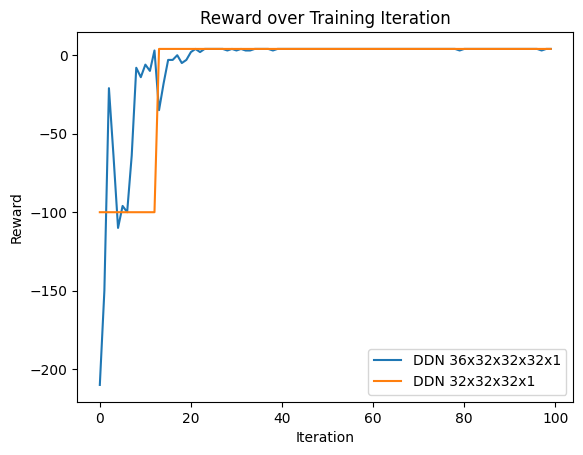

In [ ]:
plt.plot(result, label='DDN 36x32x32x32x32x32x1')
plt.plot(result2, label='DDN 32x32x32x1')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward over Training Iteration')
#plt.ylim(0, 4.3)  # Set y-axis limits
#plt.yticks([0, 1, 2, 3, 4])
plt.legend()
plt.show()

## Testing


In [ ]:
reward_history_test2 = []
time_steps_history_test2 = []

for iteration in range(200):
  policy_reward, timestep = evaluate_trained_model(model2)
  reward_history_test2.append(policy_reward)
  time_steps_history_test2.append(timestep)

In [ ]:
result_test2 = []
for i in range(len(reward_history_test2)):
    result_test2.append(reward_history_test2[i] - time_steps_history_test2[i])

print(result_test2)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


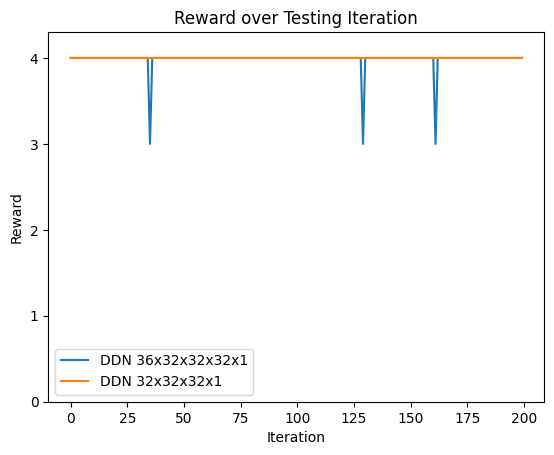

In [ ]:
plt.plot(result_test, label='DDN 36x32x32x32x32x32x1')
plt.plot(result_test2, label='DDN 32x32x32x1')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward over Testing Iteration')
plt.ylim(0, 4.3)  # Set y-axis limits
plt.yticks([0, 1, 2, 3, 4])
plt.legend()
plt.show()